<a href="https://colab.research.google.com/github/soodeh-nilforoushan/NLP-Transformers/blob/main/6_Advanced_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

In [3]:
data=load_dataset("conll2003")

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [4]:
data
#This data set includes all the information about 'pos_tags', 'chunk_tags', 'ner_tags'

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [5]:
#acess first sample
data["train"][0]
#tokens is basically list of words here not tokens! it would be better to be words instead of tokens

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [6]:
data["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None),
 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}

In [7]:
data["train"].features['ner_tags']

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [8]:
data["train"].features['ner_tags'].feature.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [9]:
data["train"][0]["tokens"]

['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']

In [10]:
#save_label
label_name=data["train"].features['ner_tags'].feature.names

In [11]:
from transformers import AutoTokenizer
#tokenize dataset
checkpoint="distilbert-base-cased"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [12]:
idx=0
#data here is already split into list of words
#the tokenizer will tokenize whole string but data here is already split into list of words
# and some of them could be possibly be tokenized to subwords
t=tokenizer(data["train"][idx]["tokens"],is_split_into_words=True)
t

{'input_ids': [101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
type(t)

transformers.tokenization_utils_base.BatchEncoding

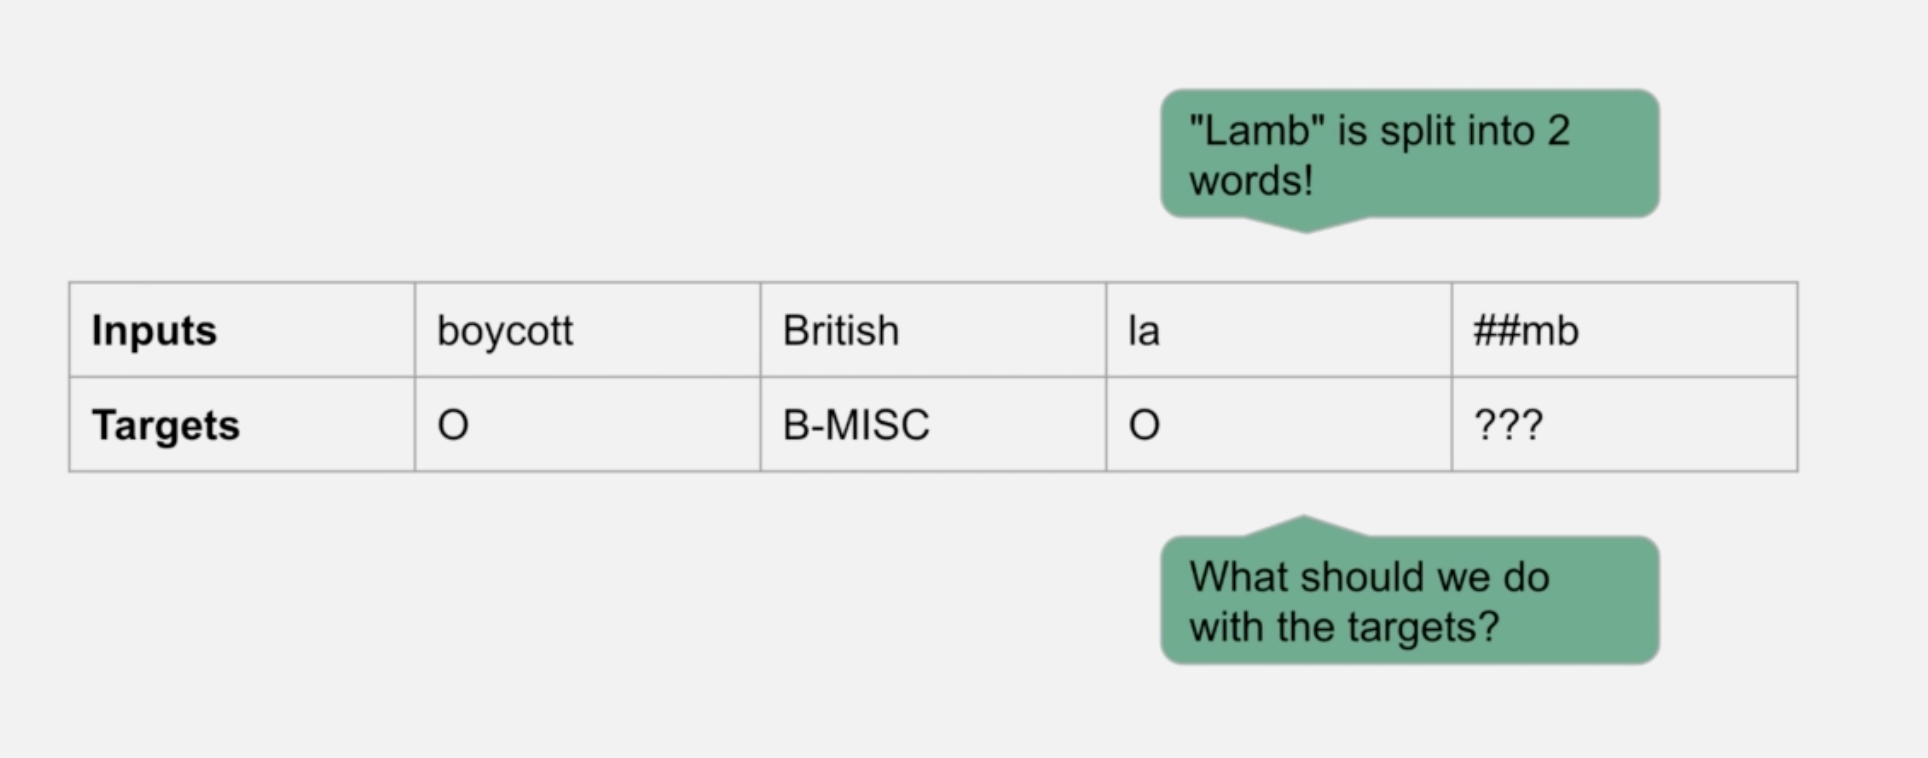

**Target Alignment**
In target aligment a word like "Jack" might split to Ja and ##ck. In this case bothe of the split words refer to person. So the NER for Ja should be B-PER and for ##ck should be I-PER

In [14]:
t.tokens()

['[CLS]',
 'EU',
 'rejects',
 'German',
 'call',
 'to',
 'boycott',
 'British',
 'la',
 '##mb',
 '.',
 '[SEP]']

Lamb has been split into sub words. Our goal is to expand the targets so that the same target will apply to both sub words.

In [15]:
t.word_ids()

[None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]

In [16]:
data["train"][0]["ner_tags"]

[3, 0, 7, 0, 0, 0, 7, 0, 0]

In [17]:
#implement align target method
#['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
#How we will map begin tags to inside tags for subwords that get split up
#for example if "Jhon" splits to "Jh","on" ---> we have to tag it as follows:'B-PER','I-PER'
#So in the above pattern when splits happen B- follows before I-
begin2inside={
    1:2,
    3:4,
    5:6,
    7:8,
}

In [18]:
def align_target(labels,word_ids):
  #words id has the same length as tokenized input
  #labels is the original labels and has the same length as untokenized input
  aligned_labels=[] # it will be the same as tokenized input
  last_word=None
  for word in word_ids:
    if word is None:
      #it is a token like [CLS]
      label=-100 # this is the value the library uses to know to ignor
    elif word!=last_word:
      #it is a new word
      label=labels[word]
    else:
      #it is the same word as before
      label=labels[word]

      #change B-<tag> to I-<tag> if necessary
      if label in begin2inside:
        label=begin2inside[label]

    #add the label
    aligned_labels.append(label)

    #update last word
    last_word=word
  return aligned_labels


In [19]:
#try the function
labels=data["train"][idx]["ner_tags"]
word_ids=t.word_ids()
aligned_targets=align_target(labels,word_ids)
aligned_targets

[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]

In [20]:
aligned_labels=[label_name[t] if t>=0 else None for t in aligned_targets]
for x,y in zip(t.tokens(),aligned_labels):
  print(f"{x}\t{y}")

[CLS]	None
EU	B-ORG
rejects	O
German	B-MISC
call	O
to	O
boycott	O
British	B-MISC
la	O
##mb	O
.	O
[SEP]	None


In [21]:
#make up a fake input just to test, it would be beter if we could test a tag that's an actual entity because we want to see whether or not B tags correctly transformed to into I tags.
words=['[CLS]','Ger','##man','call','to','boycott','Micro','##soft','[SEP]']
word_ids=[None,0,0,1,2,3,4,4,None]
labels=[7,0,0,0,3]
aligned_targets=align_target(labels,word_ids)
aligned_labels=[label_name[t] if t>=0 else None for t in aligned_targets]
for x,y in zip(words,aligned_labels):
  print(f"{x}\t{y}")

[CLS]	None
Ger	B-MISC
##man	I-MISC
call	O
to	O
boycott	O
Micro	B-ORG
##soft	I-ORG
[SEP]	None


In [24]:
#it is not only tokenizing each input sentence in the batch but also it aligns the label
def tokenize_fn(batch):
  #tokenize the input sequence first
  #this populates input_ids, attention mask and etc.
  tokenized_inputs=tokenizer(
      batch["tokens"],truncation=True, is_split_into_words=True
  )

  labels_batch=batch['ner_tags'] #original targets
  aligned_labels_batch=[] #store align lables
  for i , labels in enumerate(labels_batch):
    word_ids=tokenized_inputs.word_ids(i)
    aligned_labels_batch.append(align_target(labels,word_ids))

  #the 'target' must be store in key called 'labels'
  tokenized_inputs['labels'] =aligned_labels_batch

  return tokenized_inputs

In [25]:
#want to remove these from model inputs - they are neither inputs nor targets
# The model just need input_Ids, attention_mask, labels
data["train"].column_names

['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags']

In [26]:
tokenized_dataset=data.map(tokenize_fn, batched=True,remove_columns=data["train"].column_names)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [27]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

**Data Collator**

*   Consider our text preprocessing review:pad, truncate, Torch tensors
*   We have not been explicitly doing all of these steps and "Trianer" object is doing behind the scene on the dataset
*   Recall: We do not want to do paading to whole datset, just current batch
*   All of the above done by data collator.


*   In the next code I wanna use data_collarator








In [30]:
from transformers import DataCollatorForTokenClassification
data_collator= DataCollatorForTokenClassification(tokenizer=tokenizer)

In [32]:
tokenized_dataset["train"][0:2]


{'input_ids': [[101,
   7270,
   22961,
   1528,
   1840,
   1106,
   21423,
   1418,
   2495,
   12913,
   119,
   102],
  [101, 1943, 14428, 102]],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1]],
 'labels': [[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100], [-100, 1, 2, -100]]}

it is not the format that can we use for data collarator, instead we need grab a dictionary for each sample and store them in a list

In [34]:
#this return a different format, which is a list containing dictionaries and each dic is a individual sample.
[tokenized_dataset["train"][i] for i in range(2)]

[{'input_ids': [101,
   7270,
   22961,
   1528,
   1840,
   1106,
   21423,
   1418,
   2495,
   12913,
   119,
   102],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'labels': [-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]},
 {'input_ids': [101, 1943, 14428, 102],
  'attention_mask': [1, 1, 1, 1],
  'labels': [-100, 1, 2, -100]}]

In [35]:
#exampl
batch=data_collator([tokenized_dataset["train"][i] for i in range(2)])
batch

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'input_ids': tensor([[  101,  7270, 22961,  1528,  1840,  1106, 21423,  1418,  2495, 12913,
           119,   102],
        [  101,  1943, 14428,   102,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]), 'labels': tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100, -100]])}

In [36]:
batch["labels"]

tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100, -100]])

By adding -100 and padding, The model will just end up predicting pad token all the time which makes the accuracy looks good, but it will perform poorly on the labels we actually care about.

In [38]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 778.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=48e54381819bb5b2b80f387e5165e6c9d6fd42dc77efce61ebe8af116f836ade
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
!